# K-Means 聚类算法介绍

## 相关链接

+ https://zhuanlan.zhihu.com/p/149597282
+ https://medium.com/nerd-for-tech/k-means-algorithm-in-4-parts-5dfe1d773303

## 算法实现步骤

1. 在输入的数据中随机选择 k 个点作为中心点；
2. 将输入数据中的每个点分配到距离它最近的中心点所在集合；
3. 更新集合的中心点位置；
4. 重复步骤 2 和 3 直到中心点的位置收敛。

In [31]:
from matplotlib import pyplot
from IPython import display
import numpy as np
import time

np.random.seed(253)

class KMeans:
  def __init__(self, k):
    self.k = k
    self.max_iter = 8
    pyplot.figure(dpi=80)
    pyplot.xlabel('x'); pyplot.ylabel('f(x)')
    self.update_display_flag = False
    self.colors = ['red', 'green', 'blue', 'yellow', 'black']

  def solve(self, data):
    np.random.shuffle(data)
    self.centers = data[:self.k]
    iter_count = 0
    while iter_count < self.max_iter:
      # 更新集合
      self.clusters = [[] for _ in range(self.k)]
      for i in range(len(data)):
        min_dist = 100000000000
        min_cluster = None
        for j in range(self.k):
          dist = (data[i][0]-self.centers[j][0])**2 + (data[i][1]-self.centers[j][1])**2
          if min_dist > dist:
            min_dist = dist
            min_cluster = j
        self.clusters[min_cluster].append(data[i])
      # 更新中心点
      for i in range(self.k):
        center_x = 0
        center_y = 0
        for j in range(len(self.clusters[i])):
          center_x += self.clusters[i][j][0]
          center_y += self.clusters[i][j][1]
        self.centers[i] = (center_x/len(self.clusters[i]), center_y/len(self.clusters[i]))
      self.update_display()
      time.sleep(1)
      iter_count += 1
    pyplot.close()
    
  def update_display(self):
    pyplot.clf()
    for i in range(self.k):
      for j in range(len(self.clusters[i])):
        point = self.clusters[i][j]
        pyplot.scatter(point[0], point[1], color=self.colors[i])
      pyplot.scatter(self.centers[i][0], self.centers[i][1], marker='+', color=self.colors[i])
    if self.update_display_flag == False:
      display.display(pyplot.gcf(), display_id='fig1')
      self.update_display_flag = True
    else:
      display.update_display(pyplot.gcf(), display_id='fig1')

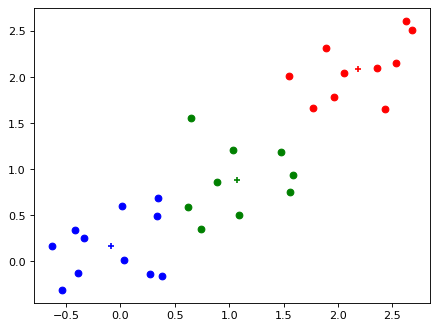

In [32]:
solver = KMeans(3)
data = []
for i in range(3):
  temp = np.random.uniform(i-0.7, i+0.7, (10, 2))
  for d in temp:
    data.append((d[0], d[1]))
solver.solve(data)